### **Loading and Reading the dataset**

In [ ]:
# Code to upload dataset from the local folder into python notebook
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Reading data
cust_data = pd.read_csv("Wholesale customers data.csv")

In [ ]:
cust_data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# Performing statistical analysis
numerical_columns = [
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicassen']
cust_data[numerical_columns].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# Checking datatypes of each column
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## ***Exploratory Data Analysis***

Text(0.5, 1.0, 'Correlation')

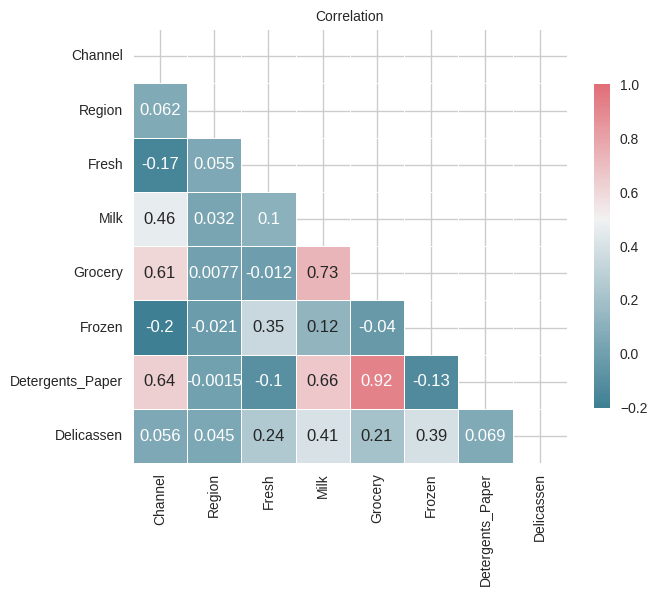

In [ ]:
#Drawing heatmap
corr = cust_data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(7, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5, square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True)
plt.title("Correlation", fontsize =10)

<Axes: >

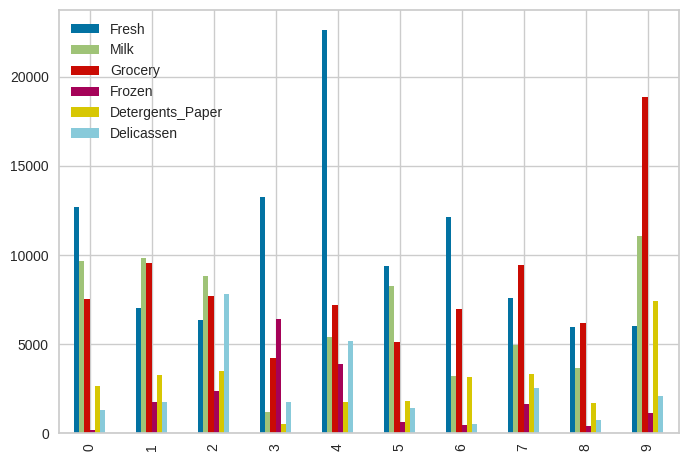

In [ ]:
# Creating bar plots
cust_data[numerical_columns].head(10).plot(kind='bar')

## **Data Preprocessing**

In [ ]:
# Checking for null values
cust_data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

**There are no-null values in the data.**

In [ ]:
# Checking and dropping duplicate values, if any
duplicate = cust_data[cust_data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
Index: []


**There are no duplicates in the data.**

In [ ]:
# Performing Normalization using MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(cust_data[numerical_columns])

# Create a dataframe from the scaled data
scaled_data = pd.DataFrame(scaled_data, columns = numerical_columns)
scaled_data.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [ ]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fresh             440 non-null    float64
 1   Milk              440 non-null    float64
 2   Grocery           440 non-null    float64
 3   Frozen            440 non-null    float64
 4   Detergents_Paper  440 non-null    float64
 5   Delicassen        440 non-null    float64
dtypes: float64(6)
memory usage: 20.8 KB


### **Deploy the DBSCAN algorithm**

In [ ]:
# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Calculating silhouette coefficient
silhouette_avg_DBSCAN = silhouette_score(scaled_data, dbscan_labels)
print('Silhouette Coefficient for DBSCAN Clustering:', silhouette_avg_DBSCAN)

Silhouette Coefficient for DBSCAN Clustering: 0.7692562904581228


### **Performing Hyperparameter tuning to get appropriate model parameters for better results.**

In [ ]:
# Define a range of epsilon and minPts values to try
epsilon_values = np.linspace(0.1, 2.0, 20)
minPts_values = range(2, 10)

# Initialize lists to store silhouette scores for different parameter combinations
silhouette_scores = []

# Loop through different parameter combinations
for eps in epsilon_values:
    for minPts in minPts_values:
        dbscan = DBSCAN(eps=eps, min_samples=minPts)
        dbscan.fit(scaled_data)

        # Check if DBSCAN created at least 2 clusters, otherwise skip
        if len(np.unique(dbscan.labels_)) > 1:
            score = silhouette_score(scaled_data, dbscan.labels_)
            silhouette_scores.append((eps, minPts, score))

# Extract epsilon, minPts, and silhouette score values
eps_values, minPts_values, scores = zip(*silhouette_scores)

# Find the parameter combination with the highest silhouette score
best_index = np.argmax(scores)
best_eps = eps_values[best_index]
best_minPts = minPts_values[best_index]


# Print the best parameters and number of clusters
print(f"Best Epsilon: {best_eps}")
print(f"Best minPts: {best_minPts}")

Best Epsilon: 0.6
Best minPts: 2


**Remodelling using above parameters**

In [ ]:
# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.6, min_samples=2)
dbscan_labels = dbscan.fit_predict(scaled_data)

### **Evaluate the quality of the clustering results**

In [ ]:
# Calculating silhouette coefficient
silhouette_avg_DBSCAN = silhouette_score(scaled_data, dbscan_labels)
print('Silhouette Coefficient for DBSCAN Clustering:', silhouette_avg_DBSCAN)

Silhouette Coefficient for DBSCAN Clustering: 0.8425394798065318


In [ ]:
# Results for DBSCAN Clustering
scaled_data['DBSCAN'] = dbscan_labels
DBSCAN_means = scaled_data.groupby('DBSCAN').mean()

# Analyze DBSCAN Means characteristics
DBSCAN_means = scaled_data.groupby('DBSCAN').mean()
print('\nDBSCAN Means:')
pd.DataFrame(DBSCAN_means)


DBSCAN Means:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
DBSCAN,,,,,,
-1,0.328530,0.597674,0.217371,0.600043,0.005781,1.00000
0,0.106473,0.076990,0.085371,0.048825,0.070657,0.02954


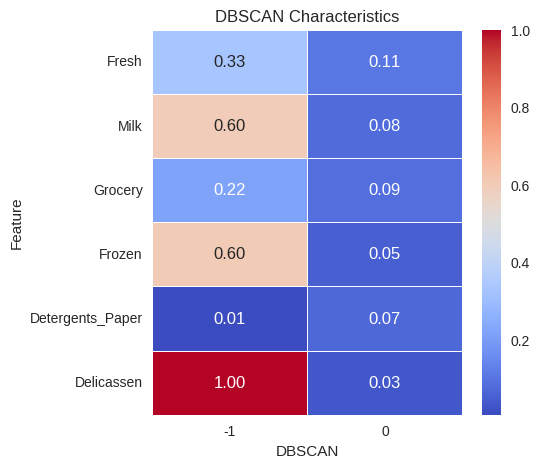

In [ ]:
# Visualizing results
plt.figure(figsize=(5, 5))
sns.heatmap(DBSCAN_means.T, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('DBSCAN Characteristics')
plt.xlabel('DBSCAN')
plt.ylabel('Feature')
plt.show()

### **Visualize the clusters**

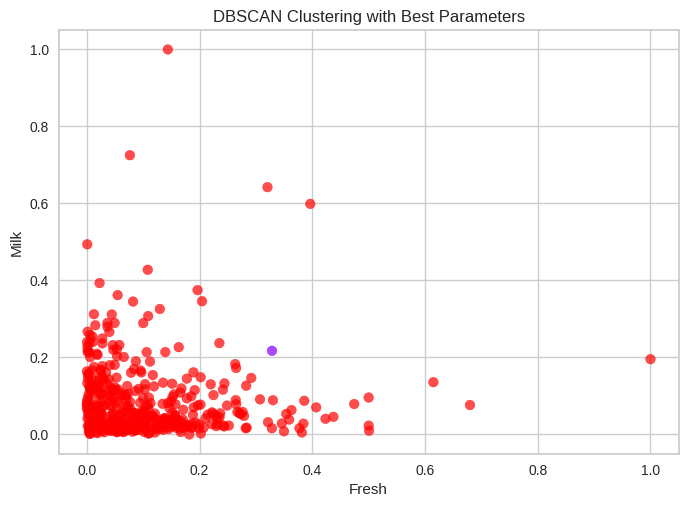

Number of clusters: 2


In [ ]:
# Perform DBSCAN with the best parameters
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_minPts)
dbscan_best.fit(scaled_data)

# Visualize the clusters (optional)
plt.scatter(scaled_data['Fresh'], scaled_data['Grocery'], c=dbscan_best.labels_, cmap='rainbow', alpha=0.7)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('DBSCAN Clustering with Best Parameters')
plt.show()


print(f"Number of clusters: {len(np.unique(dbscan_best.labels_))}")

 ### **The patterns and groupings found in the data as follows:**

- Cluster Group 0: This group represents the majority of the data points in the dataset. It is characterized by relatively low values across all the features (Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicassen). The values for each feature are generally in the range of 0.03 to 0.11. This suggests that these data points have low spending on all product categories and may represent smaller or less active customers.

- Cluster Group -1: This group, represented by the label -1 in the DBSCAN output, contains a significantly smaller number of data points compared to Cluster Group 0. The values for each feature in this group are relatively higher, especially for Milk, Grocery, and Frozen. The Detergents_Paper feature has a low value, indicating lower spending on detergents and paper products. The Delicassen feature's value is high, indicating higher spending on delicatessen items. This group may represent a subset of customers with higher spending in specific product categories, possibly indicating larger or more active customers with unique purchasing patterns.

### **strengths and limitations of the DBSCAN algorithm**

Strengths of the DBSCAN algorithm for the Wholesale Customers dataset:

- Flexibility in Handling Different Cluster Shapes: DBSCAN can handle clusters of arbitrary shapes, including non-convex and irregular shapes. This is beneficial in scenarios where the clusters in the Wholesale Customers dataset may have complex structures that cannot be captured by simple geometric shapes.

- Robust to Noise and Outliers: DBSCAN is robust to noise and can identify outliers effectively. It assigns outliers to a special cluster label (-1) called "noise," which allows the algorithm to identify and disregard noisy data points, making it suitable for datasets with potential noise and anomalies.

- Does Not Require Specifying the Number of Clusters: Unlike partition-based clustering algorithms like k-means, DBSCAN does not require the user to specify the number of clusters beforehand. It automatically determines the number of clusters based on the data's density and the chosen parameters, which can be advantageous when the number of clusters is unknown.


Limitations of the DBSCAN algorithm for the Wholesale Customers dataset:

- Sensitivity to Parameter Selection: The performance of DBSCAN is highly sensitive to the choice of parameters, specifically the values of Epsilon (eps) and Minimum Points (min_samples). Selecting appropriate parameter values may require domain knowledge or experimentation, and different parameter choices can lead to varying clustering results.

- Scalability with High-Dimensional Data: DBSCAN may encounter challenges in high-dimensional spaces due to the "curse of dimensionality." As the number of dimensions increases, the notion of "density" becomes less meaningful, making it challenging to identify meaningful clusters in high-dimensional datasets.

- Uneven Density Distributions: DBSCAN may struggle to identify clusters with varying densities. In datasets where clusters have different density levels, DBSCAN may fail to correctly capture low-density clusters that are embedded within high-density regions.